## NLP Final Project 

### Imported required libraries and packages

In [89]:
#Import Basic Libraries
import nltk
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns

# Import different Machine learning algorithm Libraries
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

#Import additional required packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define english stopwords, and define stem and lemma
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

#Ignore Warning messages
import warnings
warnings.filterwarnings("ignore") #Ignore Warning Messages

### Load the Alexa reviews dataset

In [90]:
data = pd.read_csv("amazon_alexa.tsv", sep='\t')
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


### Select only text data 

In [91]:
text_data=data['verified_reviews']
text_data

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

### Define a function to clean the the text data

#### 1 Convert the word to lower and remove punctuation

#### 2 Creating tokens

#### 3 Remove stopwords and apply lematization

In [92]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text


### Call the function to clean the data

In [93]:
clean_data=clean_text(text_data)

### Apply vectorization

In [94]:
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(clean_data)

In [95]:
print(X_counts.shape)
print(count_vect.get_feature_names())

(39503, 4098)
['00', '000', '07', '1', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '2', '20', '200', '2000', '2017', '229', '23', '24', '25this', '29', '2nd', '2package', '3', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '4', '40', '45', '48', '4am', '4ghz', '4k', '4th', '5', '50', '54', '5am', '5ghz', '5th', '6', '600', '62', '672', '6th', '7', '70', '75', '79', '8', '80', '81', '83', '85', '88', '888', '8gb', '9', '90', '91', '911', '99', '99great', 'a1', 'a19', 'abay', 'abc', 'abd', 'ability', 'able', 'abode', 'absolutely', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordinglylove', 'account', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'activate', 'activated', 'activates

###  Select the feature to match target set

In [96]:
X_counts=X_counts[:3150]
X_counts.shape

(3150, 4098)

### Preparing feature x and target y

In [97]:
X = pd.DataFrame(X_counts.toarray())
y = data['feedback'].values

### Train test split the data with 80% train and 20% test split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train and test model

### 1 Linear Support vector machine

In [99]:
SVC_classifier = LinearSVC()
SVC_classifier.fit(X_train, y_train)
print(SVC_classifier.score(X_test, y_test))

0.9047619047619048


### Apply confusion matrix to test the result

<AxesSubplot:>

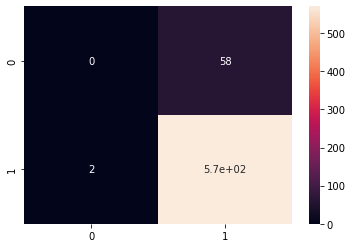

In [100]:
y_predict_test = SVC_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

### Generating the classification report to check accuracy

In [101]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.91      1.00      0.95       572

    accuracy                           0.90       630
   macro avg       0.45      0.50      0.47       630
weighted avg       0.82      0.90      0.86       630



### 2 Logistic Regression

In [102]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
print(LR.score(X_test, y_test))

0.9079365079365079


### Confusion matrix to check the result

<AxesSubplot:>

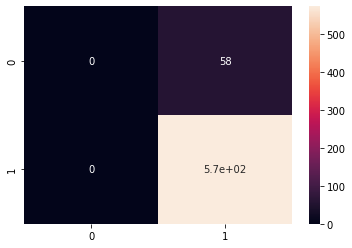

In [103]:
y_predict_test = LR.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

### Generating the classification report to check accuracy

In [104]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.91      1.00      0.95       572

    accuracy                           0.91       630
   macro avg       0.45      0.50      0.48       630
weighted avg       0.82      0.91      0.86       630



### We have used 2 different models to predict the results.
### 1. Support Vector Classifier =  Accuracy is 90% following with 58 and 2 values of false positive and false negative 
### 2. Logistic Regression = Accuracy is 91% with only 58 false positive values.
### Hence we are selecting the Logistic regression model for our dataset